In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import cv2
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test_images', 'train_images', 'test.csv', 'train.csv']


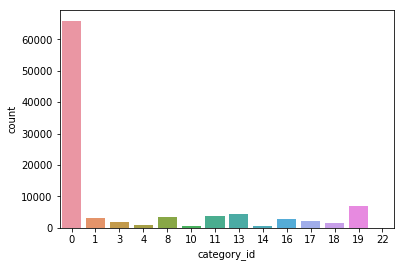

In [2]:
train_df = pd.read_csv('../input/train.csv')
#submission_df = pd.read_csv('../input/sample_submission.csv')
train_copy=train_df.copy()
train_new=train_copy.sample(frac=0.5)
train_copy = train_copy.drop(train_new.index)
test_new=train_copy.sample(frac=0.1)
sns.countplot(train_new.category_id)

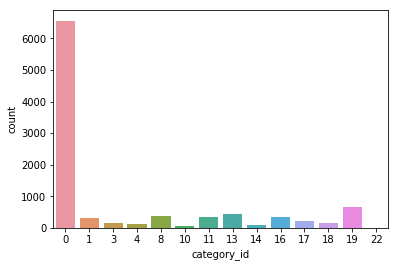

In [3]:
sns.countplot(test_new.category_id)

In [4]:
train_new['category_id'].value_counts()

0     65881
19     7078
13     4322
11     3629
8      3432
1      3010
16     2902
17     2334
3      1723
18     1544
4      1063
14      643
10      572
22       17
Name: category_id, dtype: int64

In [5]:
test_new['category_id'].value_counts()

0     6554
19     670
13     444
8      361
11     344
16     341
1      315
17     211
3      164
18     147
4      117
14      82
10      64
22       1
Name: category_id, dtype: int64

In [ ]:
def pad_and_resize(image_path, dataset, pad=False, desired_size=32):
    img = cv2.imread(f'../input/{dataset}_images/{image_path}.jpg')
    resized = cv2.resize(img, (desired_size,)*2).astype('uint8') 
    return resized

In [ ]:
train_resized_imgs = []
test_resized_imgs = []

for image_id in train_new['id']:
    train_resized_imgs.append(
        pad_and_resize(image_id, 'train')
    )

for image_id in test_new['id']:
    test_resized_imgs.append(
        pad_and_resize(image_id, 'train')
    )

In [ ]:
X_train = np.stack(train_resized_imgs)
X_test = np.stack(test_resized_imgs)

target_dummies = pd.get_dummies(train_new['category_id'])
train_label = target_dummies.columns.values
y_train = target_dummies.values

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

In [ ]:
np.save('X_newtrain.npy', X_train)
np.save('X_newtest.npy', X_test)
np.save('y_newtrain.npy', y_train)

In [ ]:
target_dummies = pd.get_dummies(test_new['category_id'])
train_label = target_dummies.columns.values
y_test= target_dummies.values

In [ ]:
np.save('y_newtest.npy', y_train)

In [ ]:
y_coltrain=train_new['category_id']
np.save('y_coltrain.npy', y_coltrain)
y_coltest=test_new['category_id']
np.save('y_coltest.npy', y_coltest)

In [ ]:
np.save('train_new.npy', train_new)
np.save('test_new.npy', test_new)